# Importing Libraries and the dataset

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
% matplotlib inline

In [30]:
df = pd.read_csv("/Users/joudsi/Desktop/output.csv")

In [32]:
df.head()

,Unnamed: 0,subject_id,hadm_id,icu,amdission_age,gender,thirty_day_mort,heartrate_mean,meanbp_mean,sysbp_mean,tempc_mean,spo2_mean,resprate_mean,glucose_vitals,creatinine_max,potassium_max,sodium_max,chloride_max,bicarbonate_max,hematocrit_max,wbc_max,glucose_max,lactate_max,aniongap_max,albumin_max,bands_max,bilirubin_max,hemoglobin_max,lactate_max.1,ptt_max,inr_max,pt_max,bun_max,is_AKI,is_Betablocker
0,0,26264,163486,211181,58.5394,0,1,88.464286,90.333333,143.200000,37.261905,95.678571,19.266667,98.000000,0.8,4.0,137.0,102.0,25.0,42.8,11.1,97.0,NaN,14.0,NaN,NaN,NaN,15.4,NaN,24.9,1.2,13.2,8.0,0,1
1,1,86580,145497,285183,53.3505,0,1,115.125000,80.260870,111.217391,37.468254,95.818182,25.375000,100.000000,1.1,4.2,137.0,104.0,26.0,32.6,14.2,100.0,NaN,11.0,NaN,NaN,0.4,9.8,NaN,NaN,NaN,NaN,18.0,0,0
2,2,28410,121857,295447,80.3927,0,1,91.909091,70.035714,120.413793,36.222222,98.333333,18.857143,144.714286,0.4,3.9,144.0,113.0,26.0,23.8,11.3,145.0,4.8,10.0,NaN,NaN,NaN,7.7,4.8,37.1,1.3,15.1,20.0,1,0
3,3,61683,197678,237242,61.1226,0,1,106.521739,76.772727,117.000000,36.694444,99.043478,24.173913,106.000000,6.5,4.6,142.0,113.0,13.0,40.0,17.3,106.0,0.9,29.0,3.0,NaN,0.2,13.2,0.9,27.3,1.1,11.4,152.0,1,0
4,4,23626,166653,230856,61.6232,0,0,44.896552,73.180328,107.344262,34.769841,99.711864,14.207547,183.428571,0.9,4.5,140.0,109.0,24.0,35.5,7.5,216.0,2.0,13.0,NaN,NaN,0.7,12.5,2.0,26.1,1.1,13.1,22.0,0,0


# information about the dataset columns and its statistics

In [33]:
list(df.columns.values)

['Unnamed: 0',
 'subject_id',
 'hadm_id',
 'icu',
 'amdission_age',
 'gender',
 'thirty_day_mort',
 'heartrate_mean',
 'meanbp_mean',
 'sysbp_mean',
 'tempc_mean',
 'spo2_mean',
 'resprate_mean',
 'glucose_vitals',
 'creatinine_max',
 'potassium_max',
 'sodium_max',
 'chloride_max',
 'bicarbonate_max',
 'hematocrit_max',
 'wbc_max',
 'glucose_max',
 'lactate_max',
 'aniongap_max',
 'albumin_max',
 'bands_max',
 'bilirubin_max',
 'hemoglobin_max',
 'lactate_max.1',
 'ptt_max',
 'inr_max',
 'pt_max',
 'bun_max',
 'is_AKI',
 'is_Betablocker']

In [36]:
print("# of observations: ", str(len(df.index)))

('# of observations: ', '12467')


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12467 entries, 0 to 12466
Data columns (total 35 columns):
Unnamed: 0         12467 non-null int64
subject_id         12467 non-null int64
hadm_id            12467 non-null int64
icu                12467 non-null int64
amdission_age      12467 non-null float64
gender             12467 non-null int64
thirty_day_mort    12467 non-null int64
heartrate_mean     12433 non-null float64
meanbp_mean        12432 non-null float64
sysbp_mean         12422 non-null float64
tempc_mean         12256 non-null float64
spo2_mean          12410 non-null float64
resprate_mean      12423 non-null float64
glucose_vitals     12323 non-null float64
creatinine_max     12354 non-null float64
potassium_max      12366 non-null float64
sodium_max         12364 non-null float64
chloride_max       12355 non-null float64
bicarbonate_max    12337 non-null float64
hematocrit_max     12348 non-null float64
wbc_max            12323 non-null float64
glucose_max        12

# counting the numbers for the AKI patients and BB treatments

In [26]:
is_AKI = df[df['is_AKI'] == 1]

is_bb = df[df['is_Betablocker'] == 1]

is_AKI_bb = df[ (df['is_AKI'] ==1) & (df['is_Betablocker'] == 1) ]

is_AKI_Not_bb = df[ (df['is_AKI'] ==1) & (df['is_Betablocker'] == 0) ]

print('Number of observations for patients with sepsis: ' + str(len(df)))
print('########################################################################')
print( 'Number of sepsis patients with AKI: ' + str(len(is_AKI)))
print( 'Number of sepsis patients Who took bb treatment: ' + str(len(is_bb)))
print( 'Number of sepsis patients with AKI and took bb: ' + str(len(is_AKI_bb)))
print( 'Number of sepsis patients with AKI and didn\'t took bb: ' + str(len(is_AKI_Not_bb)))
print('########################################################################')
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
df.describe()

Number of observations for patients with sepsis: 12467
########################################################################
Number of sepsis patients with AKI: 5326
Number of sepsis patients Who took bb treatment: 5997
Number of sepsis patients with AKI and took bb: 2674
Number of sepsis patients with AKI and didn't took bb: 2652
########################################################################


,Unnamed: 0,subject_id,hadm_id,icu,amdission_age,gender,thirty_day_mort,heartrate_mean,meanbp_mean,sysbp_mean,tempc_mean,spo2_mean,resprate_mean,glucose_vitals,creatinine_max,potassium_max,sodium_max,chloride_max,bicarbonate_max,hematocrit_max,wbc_max,glucose_max,lactate_max,aniongap_max,albumin_max,bands_max,bilirubin_max,hemoglobin_max,lactate_max.1,ptt_max,inr_max,pt_max,bun_max,is_AKI,is_Betablocker
count,12467.000000,12467.000000,12467.000000,12467.000000,12467.000000,12467.000000,12467.000000,12433.000000,12432.000000,12422.000000,12256.000000,12410.000000,12423.000000,12323.000000,12354.000000,12366.000000,12364.000000,12355.000000,12337.000000,12348.000000,12323.000000,12363.000000,9106.000000,12287.000000,6100.000000,2710.000000,7403.000000,12333.000000,9106.000000,11271.000000,11315.000000,11316.000000,12353.000000,12467.000000,12467.00000
mean,6233.000000,38630.683725,149918.834443,250363.269592,66.833574,0.467554,0.411326,88.337630,76.168888,116.463336,36.852295,96.903324,19.897732,153.782760,1.845864,4.691072,140.243287,107.030838,24.616706,34.684580,15.106615,182.925099,3.279818,16.707089,3.009607,11.826790,2.403472,11.502643,3.279818,46.409218,1.843297,18.250000,35.500607,0.427208,0.48103
std,3599.057238,29480.507137,28813.469107,28845.933407,16.637102,0.498966,0.492094,16.760893,11.337419,17.244430,0.736669,3.182775,4.424329,1287.470709,1.771256,0.984509,5.475853,6.954705,5.090799,5.890186,13.867041,105.064830,2.946184,5.066390,0.681743,11.864704,5.424248,2.044236,2.946184,31.813060,1.735669,11.309032,26.802839,0.494693,0.49966
min,0.000000,3.000000,100011.000000,200003.000000,16.980400,0.000000,0.000000,34.844828,24.535714,46.000000,31.955555,11.166667,7.000000,21.000000,0.100000,1.900000,108.000000,67.000000,5.000000,16.400000,0.100000,34.000000,0.400000,4.000000,1.000000,0.900000,0.100000,4.800000,0.400000,14.400000,0.800000,9.300000,2.000000,0.000000,0.00000
25%,3116.500000,14209.500000,125318.000000,225512.000000,55.641850,0.000000,0.000000,76.200000,68.392469,104.105733,36.398149,95.880000,16.727273,111.000000,0.900000,4.100000,137.000000,103.000000,21.000000,30.400000,9.200000,124.000000,1.500000,13.000000,2.500000,3.000000,0.400000,10.000000,1.500000,28.300000,1.200000,13.500000,17.000000,0.000000,0.00000
50%,6233.000000,28140.000000,149764.000000,250718.000000,68.931300,0.000000,0.000000,87.400000,74.763257,113.500000,36.822222,97.400000,19.285714,132.500000,1.300000,4.500000,140.000000,107.000000,24.000000,34.000000,13.000000,157.000000,2.300000,16.000000,3.000000,8.000000,0.700000,11.300000,2.300000,34.200000,1.400000,15.000000,27.000000,0.000000,0.00000
75%,9349.500000,63363.500000,175271.500000,275555.000000,80.021650,1.000000,1.000000,99.620690,82.875000,126.912055,37.309524,98.679643,22.528595,162.000000,2.100000,5.100000,143.000000,111.000000,27.000000,38.300000,18.400000,207.000000,3.900000,19.000000,3.500000,17.000000,1.700000,12.800000,3.900000,47.700000,1.800000,18.325000,45.000000,1.000000,1.00000
max,12466.000000,99991.000000,199999.000000,299998.000000,91.400000,1.000000,1.000000,163.875000,133.000000,195.343750,40.000000,100.000000,43.777778,142966.857143,27.500000,19.600000,182.000000,155.000000,50.000000,62.700000,846.700000,1700.000000,32.000000,54.000000,5.600000,79.000000,82.800000,20.100000,32.000000,150.000000,48.200000,150.000000,272.000000,1.000000,1.00000


In [28]:
df.shape

(12467, 35)

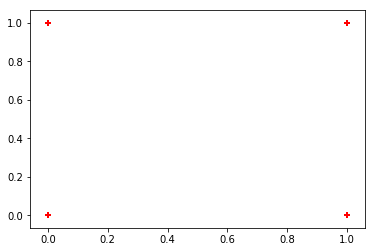

In [16]:
plt.scatter(df.is_Betablocker, df.is_AKI, marker = '+', color = 'red')

# Start building the binary logistic regression to check whether the BB is statistically difference

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df[['is_Betablocker']], df.is_AKI, test_size = 0.1)

model = LogisticRegression()

In [19]:

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

### Accuracy of the model

In [21]:
model.score(x_train, y_train)

0.5724598930481284

In [22]:
model.score(x_test, y_test)

0.5757818765036087

### calculating the p-value of the model

In [23]:
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
print('p-value is:')
print(est.fit().f_pvalue)

p-value is:
0.0007900529971042552
